In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

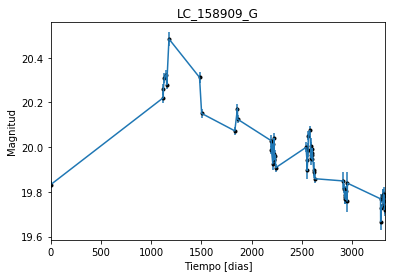

In [2]:
data = np.genfromtxt('LC_158909_G.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_158909_G')
plt.savefig("LC_158909_G.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

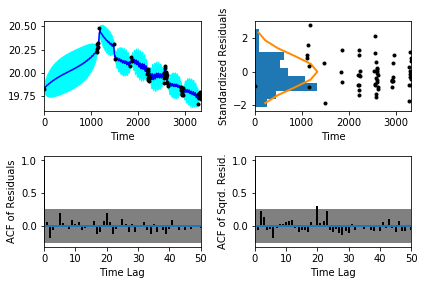

In [5]:
sample.assess_fit()

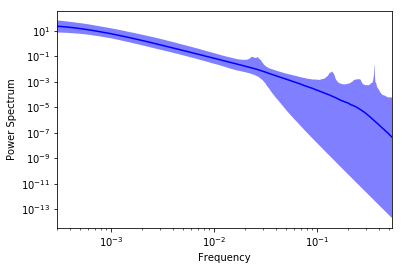

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

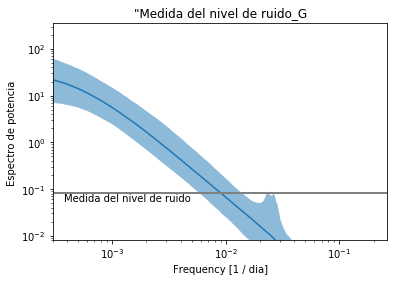

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_158909_G')
plt.title('"Medida del nivel de ruido_G')
plt.savefig("Medida del nivel de ruido_G.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_158909_G')

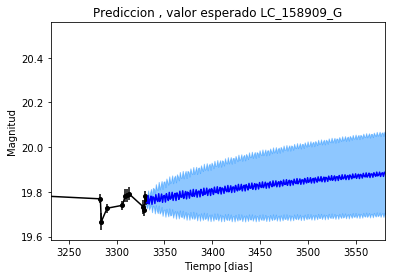

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_158909_G')

Text(0.5,1,'Prediccion, Caminos simulados  LC_158909_G')

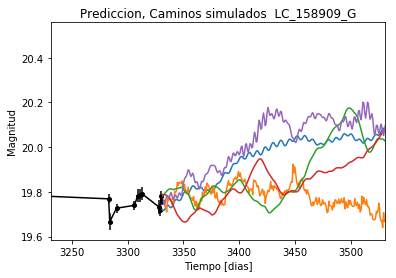

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados  LC_158909_G')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


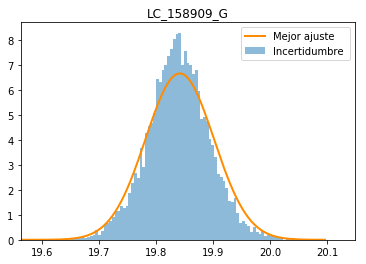

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_158909_G')
plt.savefig("Mejor_ajuste_LC_158909_G.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_158909_G')

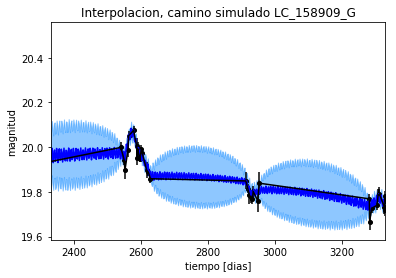

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_158909_G')

Text(0.5,1,'Interpolacion, camino simulado LC_158909_G')

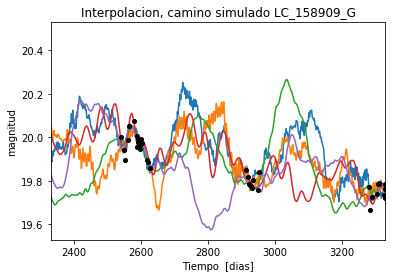

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_158909_G')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 345.595385734
Median: 0.0119612562571
Standard deviation: 0.18079617047
68% credibility interval: [ 0.00117049  0.13496562]
95% credibility interval: [  4.41005616e-04   7.27089375e-01]
99% credibility interval: [  3.57585794e-04   9.48412655e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 990.30234973
Median: 0.0071347973011
Standard deviation: 0.0856057667902
68% credibility interval: [ 0.00060563  0.05441009]
95% credibility interval: [ 0.00036326  0.26433478]
99% credibility interval: [  3.12088056e-04   6.04635361e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 396.527659442
Median: 0.102563764906
Standard devi

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 276.274788798
Median: 108.173489795
Standard deviation: 2.52985943909
68% credibility interval: [ 106.0496993   110.39708035]
95% credibility interval: [ 103.16294286  114.08453861]
99% credibility interval: [ 100.87721832  115.54214508]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 375.863394501
Median: 1.20239906714
Standard deviation: 2.56266870689
68% credibility interval: [ 0.23741985  5.17558897]
95% credibility interval: [ 0.04571971  8.67591678]
99% credibility interval: [  0.02899323  11.75642049]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 203.300304487
Median: 3.47393705214
Standard deviation: 10.6045997038
68% credibility interval: [  0.29228814  16.36081775]
95% credibility interval: [  2.65741859e

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 5777.27796526
Median: 2.12238707813e-82
Standard deviation: 1.0750089488e+83
68% credibility interval: [  8.44999436e-150   1.39454739e-023]
95% credibility interval: [  2.35785360e-182   1.06874042e-001]
99% credibility interval: [  7.42164257e-188   7.64045270e+001]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1798.76000624
Median: 19.9831359457
Standard deviation: 0.106645597091
68% credibility interval: [ 19.88122089  20.07340551]
95% credibility interval: [ 19.75345134  20.1864477 ]
99% credibility interval: [ 19.65378417  20.27389909]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 275.398532134
Median: 0.199967499489
Standard deviation: 0.261610045167
68% credibility interval: [ 0.01820874  0.54995936]
95% credibility interval: [ 0.          0.92372402]
99% credibility interval: [ 0.          1.02957643]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 275.398532134
Median: 0.199967499489
Standard deviation: 0.261610045167
68% credibility interval: [ 0.01820874  0.54995936]
95% credibility interval: [ 0.          0.92372402]
99% credibility interval: [ 0.          1.02957643]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 2345.07073889
Median: 0.0
Standard deviation: 0.000199379625561
68% cred

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 276.274788798
Median: 108.173489795
Standard deviation: 2.52985943909
68% credibility interval: [ 106.0496993   110.39708035]
95% credibility interval: [ 103.16294286  114.08453861]
99% credibility interval: [ 100.87721832  115.54214508]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1042.62693064
Median: 0.0463322047042
Standard deviation: 0.0292085880604
68% credibility interval: [ 0.03105608  0.07323044]
95% credibility interval: [ 0.02119648  0.1224966 ]
99% credibility interval: [ 0.01694742  0.19120527]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 386.139196732
Median: 1.14303486952
Standard deviation: 0.248953765932
68% credibility interval: [ 0.91082011  1.40140182]
95% credibility interval: [ 0.70826922  1.6992695 ]
99% credibility interval: [ 0.58324973  1.87370976]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 379.406470831
Median: 0.0226656098974
Standard deviation: 0.368844573558
68% credibility interval: [ 0.00089044  0.19083359]
95% credibility interval: [  1.77178632e-05   1.16054017e+00]
99% credibility interval: [  1.06253962e-05   2.46928126e+00]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 345.595385734
Median: (-0.07515478957-1.01838482254j)
Standard deviation: 1.99808326644
68% credibility interval: [-0.84801402+0.j         -0.00735442-2.26040985j]
95% credibility interval: [ -4.56843728e+00+0.j          -2.77092001e-03-4.04419036j]
99% credibility interval: [ -5.95905246e+00+0.j          -2.24677781e-03-0.18486552j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 990.30234973
Median: (-0.044829253572+1.90178157647j)
Standard deviation: 1.72951067693
68% credibility interval: [-0.34186865+1.159265j -0.00380530+0.j      ]
95% credibility interval: [-1.66086444+5.63703252j -0.00228244+0.j        ]
99% credibility interval: [ -3.79903602e+00+0.54025014j  -1.96090709e-03+0.j        ]
Posterior summary for 